In [1]:
include("./BBTNet/datasets/WIDERFACE.jl")

root_dir = "../Datasets/WIDERFACE/WIDER_"
train_data = WIDER_Data(root_dir * "train/")
print("WIDER Data is read. Total images: ", train_data.num_files, " & Total Faces: ", train_data.num_faces, '\n')

WIDER Data is read. Total images: 12880 & Total Faces: 159424


In [2]:
include("./BBTNet/datasets/WIDERFACE.jl")

(imgs, boxes), state = iterate(train_data)
print("Got the first batch: ", size(imgs))

Got the first batch: (3, 640, 640, 32)

In [3]:
include("./BBTNet/utils/ImageReader.jl")

train_reader = Image_Reader(true)
test_reader = Image_Reader(false)

filename = "0--Parade/0_Parade_marchingband_1_799.jpg"
img, bboxes = read_img(train_reader, root_dir * "train/images/" * filename, train_data.bboxes[filename], 640)
print("Image file is read: ", filename, '\n')

Image file is read: 0--Parade/0_Parade_marchingband_1_799.jpg


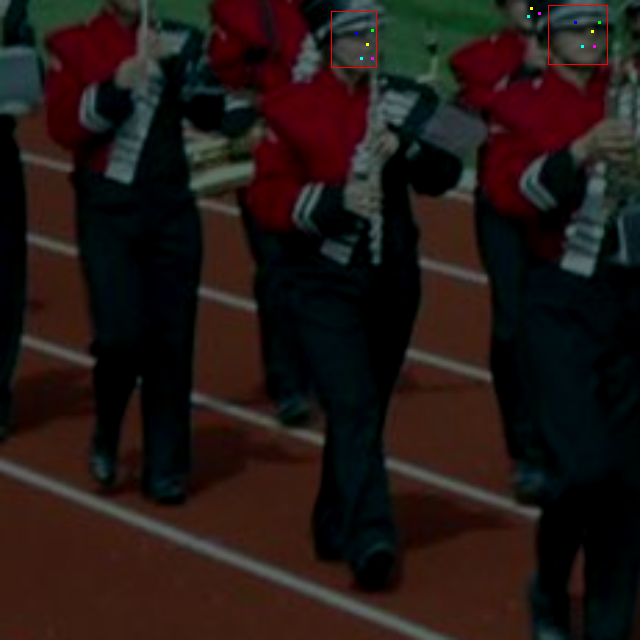

In [4]:
include("./BBTNet/utils/draw.jl")

draw_boxes_and_landmarks(img, bboxes)

## Running The Model

In [7]:
include("./BBTNet/models/retinaface.jl")

# atype = KnetArray{Float32}
atype = Array{Float32}

x = convert(atype, rand(640, 640, 3, 2))
model = RetinaFace(dtype=atype)

c, b, l = model(x, train=false)
print(size(c), " & ", size(b), " & ", size(l), " \n")

(2, 102300, 2) & (2, 102300, 4) & (2, 102300, 10) 


In [8]:
temp = [1 2 3 4]
temp[1:3]

3-element Array{Int64,1}:
 1
 2
 3

In [2]:
using JLD2
using FileIO

@save "retinaface_rand.jld2" model
model_dict = load("retinaface_rand.jld2")
model2 = model_dict["model"]
print("Model is loaded from a file!\n")

, Knet.Ops20.relu, 0), ConvBn(Conv2D(P(Array{Float32,4}(3,3,128,128)), nothing, nothing, 0, 1, 1, 1), BatchNorm(Knet.Ops20.BNMoments(0.1f0, Float32[0.0017853029]

Float32[-0.01402768]

Float32[0.0026418974]

...

Float32[0.08283618]

Float32[-0.025825266]

Float32[-0.04433552], Float32[0.9350527]

Float32[0.93355787]

Float32[0.93345493]

...

Float32[0.9330629]

Float32[0.9335356]

Float32[0.9354259], zeros, ones)), Knet.Ops20.relu, 0), Conv2D(P(Array{Float32,4}(1,1,128,512)), nothing, nothing, 0, 0, 1, 1), BatchNorm(Knet.Ops20.BNMoments(0.1f0, Float32[0.02965729]

Float32[0.01916391]

Float32[0.022794954]

...

Float32[0.09152418]

Float32[0.08834305]

Float32[0.02725944], Float32[0.9620161]

Float32[0.96156555]

Float32[0.9686653]

...

Float32[0.96333563]

Float32[0.96608996]

Float32[0.9636663], zeros, ones))), Residual_1x3x1(nothing, ConvBn(Conv2D(P(Array{Float32,4}(1,1,512,128)), nothing, nothing, 0, 0, 1, 1), BatchNorm(Knet.Ops20.BNMoments(0.1f0, Float32[-0.067231975]

Float32[